In [39]:
# Getting started with airborne data from the NASA ASIA-AQ field campaign
# Author: Katie Travis (katherine.travis@nasa.gov)
# Created: 4/12/2024
# Updates:


In [42]:
# Mount Google Drive. To make this work for your own drive, create a folder in the top level called ASIA-AQDC8, and put the aircraft files there from 2/13.
# Get the files from here: https://www-air.larc.nasa.gov/cgi-bin/ArcView/asiaaq?DC8=1
from google.colab import drive
drive.mount('/content/drive')# if you need to remount after adding files, use this in the drive.mount call: , force_remount=True)

Mounted at /content/drive


In [75]:
# Christoph Knote made a nice reader for data in ICARTT format.
# ICARTT files are csv files but with specific requirements for NASA data. The header of an ICARTT file has information
# including the PI, instrument, contact information, data usage instructions etc.  Open an ICARTT file in TextEdit or similar
# application and read the header before using the data.
#
#!pip install icartt # do this the first time to get the icartt package, then comment out
import icartt # reader for aircraft data
import pandas as pd #python package for making easy to use data structures
from datetime import datetime, timedelta # for working with time variables
import os # for opening files
import geopandas as gpd # package for geo-referencing data for plotting on a map
import matplotlib.pyplot as plt # plotting package
from matplotlib import gridspec # plotting subplots
#!pip install contextily first time run this then comment out
import contextily as ctx # backage for basemaps
import shapely # for working with spatial distances

In [45]:
# Directory where my ASIA-AQ DC-8 files are for the Philippines
os.listdir('/content/drive/MyDrive/ASIA-AQDC8/')

['asiaaq-mrg1_dc8_20240213_RA_20240422T155951.ict']

In [46]:
# Lets look at PM2.5 along the flight track in the Philippines on 2/13th.  We need the PM2.5 data from one of the instruments and the aircraft position data.
f1='/content/drive/MyDrive/ASIA-AQDC8/asiaaq-mrg1_dc8_20240213_RA_20240422T155951.ict'

# Read in the merge file for 2/13 that I made with the AMS and SP2 data
ict = icartt.Dataset(f1)
aircraft = ict.data[:]# get data out of dataset
aircraft = pd.DataFrame(aircraft)# make into a Pandas dataframe for easy manipulation
aircraft

/usr/local/lib/python3.10/dist-packages/icartt/dataset.py:392: UserWarning: Variable short name NR_Chloride_prec_PM1_AMS_JIMENEZ does not comply with ICARTT standard v2
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/icartt/dataset.py:392: UserWarning: Variable short name OrgNitr_Fraction_PM1_AMS_JIMENEZ does not comply with ICARTT standard v2
  warnings.warn(


,Time_Start,Time_Stop,Day_Of_Year,Latitude,Longitude,Pressure_Altitude,Static_Air_Temp,Static_Pressure,Solar_Zenith_Angle,LAT_AMS_JIMENEZ,...,f60_PM1_AMS_JIMENEZ,f82_PM1_AMS_JIMENEZ,f91_PM1_AMS_JIMENEZ,fC2H3O_PM1_AMS_JIMENEZ,fCO2_PM1_AMS_JIMENEZ,fC4H9_PM1_AMS_JIMENEZ,fC2H4O2_PM1_AMS_JIMENEZ,fC5H6O_PM1_AMS_JIMENEZ,fC7H7_PM1_AMS_JIMENEZ,BC_mass_MOORE
0,3991.0,3992.0,44.0,15.175041,120.558062,264.0,27.67,1003.62,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3992.0,3993.0,44.0,15.175044,120.558064,265.0,27.52,1003.58,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3993.0,3994.0,44.0,15.175055,120.558069,266.0,27.32,1003.55,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3994.0,3995.0,44.0,15.175085,120.558079,267.0,27.21,1003.51,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3995.0,3996.0,44.0,15.175121,120.558094,269.0,27.40,1003.44,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29715,33706.0,33707.0,44.0,15.190904,120.561294,316.0,30.32,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29716,33707.0,33708.0,44.0,15.190888,120.561253,316.0,30.27,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29717,33708.0,33709.0,44.0,15.190879,120.561211,316.0,30.27,1001.73,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29718,33709.0,33710.0,44.0,15.190873,120.561168,317.0,30.27,1001.70,81.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
aircraft.columns # get all variable names we need

Index(['Time_Start', 'Time_Stop', 'Day_Of_Year', 'Latitude', 'Longitude',
       'Pressure_Altitude', 'Static_Air_Temp', 'Static_Pressure',
       'Solar_Zenith_Angle', 'LAT_AMS_JIMENEZ', 'LON_AMS_JIMENEZ',
       'ALT_AMS_JIMENEZ', 'OA_PM1_AMS_JIMENEZ', 'OA_prec_PM1_AMS_JIMENEZ',
       'OA_DL_PM1_AMS_JIMENEZ', 'Sulfate_PM1_AMS_JIMENEZ',
       'Sulfate_prec_PM1_AMS_JIMENEZ', 'Sulfate_DL_PM1_AMS_JIMENEZ',
       'Nitrate_PM1_AMS_JIMENEZ', 'Nitrate_prec_PM1_AMS_JIMENEZ',
       'Nitrate_DL_PM1_AMS_JIMENEZ', 'Ammonium_PM1_AMS_JIMENEZ',
       'Ammonium_prec_PM1_AMS_JIMENEZ', 'Ammonium_DL_PM1_AMS_JIMENEZ',
       'NR_Chloride_PM1_AMS_JIMENEZ', 'NR_Chloride_prec_PM1_AMS_JIMENEZ',
       'NR_Chloride_DL_PM1_AMS_JIMENEZ', 'Seasalt_PM1_AMS_JIMENEZ',
       'Seasalt_prec_PM1_AMS_JIMENEZ', 'Seasalt_DL_PM1_AMS_JIMENEZ',
       'MSA_PM1_AMS_JIMENEZ', 'MSA_prec_PM1_AMS_JIMENEZ',
       'MSA_DL_PM1_AMS_JIMENEZ', 'ClO4_PM1_AMS_JIMENEZ',
       'ClO4_prec_PM1_AMS_JIMENEZ', 'ClO4_DL_PM1_AMS_JIMENEZ',

In [50]:
# The AMS observes almost all the components of PM1, which should be very close to PM2.5. The only thing it does not have is BC which we get from the LARGE SP2.
# Let's not include seasalt, chloride, etc right now until we get a handle on the main components of OA + SO4 + NO3 + NH4 + BC
# From the header of each file, units of AMS are in ug/sm3 (273 K & 1013 mb), units of SP2 are in ng/sm3 (0 deg C, 1013.25 mb)
aircraft['PM1'] = aircraft['OA_PM1_AMS_JIMENEZ'] + aircraft['Sulfate_PM1_AMS_JIMENEZ'] + aircraft['Ammonium_PM1_AMS_JIMENEZ'] + aircraft['Nitrate_PM1_AMS_JIMENEZ'] + aircraft['BC_mass_MOORE']/1E3
aircraft['PM1']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
29715   NaN
29716   NaN
29717   NaN
29718   NaN
29719   NaN
Name: PM1, Length: 29720, dtype: float64

In [73]:
# Convert DataFrame to GeoDataFrame
aircraft_gdf = gpd.GeoDataFrame(aircraft, geometry=gpd.points_from_xy(aircraft['Longitude'], aircraft['Latitude']))
# Set the coordinate reference system (CRS) to WGS84 (lat/lon)
aircraft_gdf.crs = 'EPSG:4326'
# For plotting low-level data
subset = aircraft_gdf[aircraft_gdf['Pressure_Altitude'] < 300]
subset

,Time_Start,Time_Stop,Day_Of_Year,Latitude,Longitude,Pressure_Altitude,Static_Air_Temp,Static_Pressure,Solar_Zenith_Angle,LAT_AMS_JIMENEZ,...,f91_PM1_AMS_JIMENEZ,fC2H3O_PM1_AMS_JIMENEZ,fCO2_PM1_AMS_JIMENEZ,fC4H9_PM1_AMS_JIMENEZ,fC2H4O2_PM1_AMS_JIMENEZ,fC5H6O_PM1_AMS_JIMENEZ,fC7H7_PM1_AMS_JIMENEZ,BC_mass_MOORE,PM1,geometry
0,3991.0,3992.0,44.0,15.175041,120.558062,264.0,27.67,1003.62,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.55806 15.17504)
1,3992.0,3993.0,44.0,15.175044,120.558064,265.0,27.52,1003.58,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.55806 15.17504)
2,3993.0,3994.0,44.0,15.175055,120.558069,266.0,27.32,1003.55,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.55807 15.17506)
3,3994.0,3995.0,44.0,15.175085,120.558079,267.0,27.21,1003.51,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.55808 15.17508)
4,3995.0,3996.0,44.0,15.175121,120.558094,269.0,27.40,1003.44,54.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.55809 15.17512)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,33572.0,33573.0,44.0,15.196244,120.565878,298.0,30.60,1002.39,81.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.56588 15.19624)
29582,33573.0,33574.0,44.0,15.196282,120.565807,298.0,30.60,1002.39,81.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.56581 15.19628)
29583,33574.0,33575.0,44.0,15.196314,120.565733,299.0,30.50,1002.35,81.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.56573 15.19631)
29584,33575.0,33576.0,44.0,15.196341,120.565656,299.0,30.40,1002.35,81.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (120.56566 15.19634)


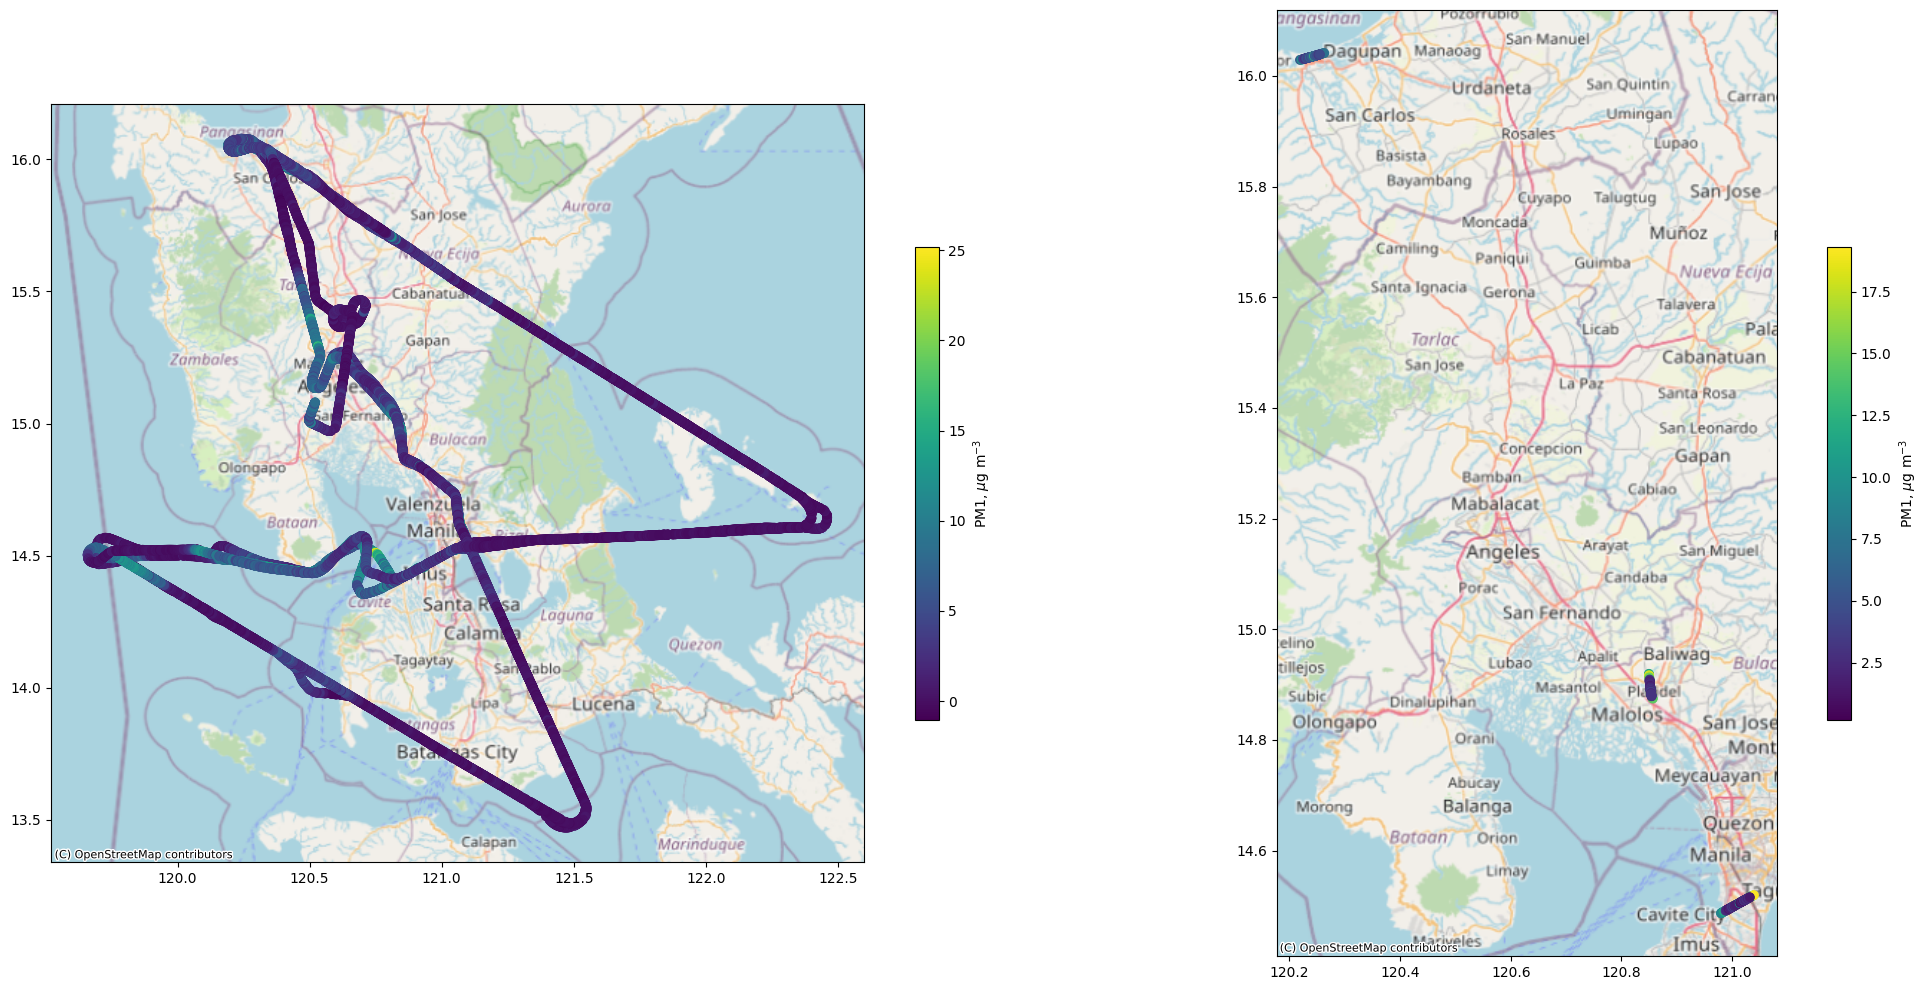

In [84]:
# Set a colormap for the data
cmap = plt.get_cmap('viridis')

# Set up a plot
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Equal width for both subplots

# Plot the entire flight
ax1 = fig.add_subplot(gs[0])

# Use normalization for consistent coloring
aircraft_gdf.plot(ax=ax1, column='PM1', cmap=cmap, legend=True, legend_kwds={'label': "PM1, $\\mu$g m$^{-3}$", 'shrink': 0.5})
# Add basemap
ctx.add_basemap(ax1, crs=aircraft_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Second subplot for just data below 100 m
ax2 = fig.add_subplot(gs[1])
# Use normalization for consistent coloring
subset.plot(ax=ax2, column='PM1', cmap=cmap, legend=True, legend_kwds={'label': "PM1, $\\mu$g m$^{-3}$", 'shrink': 0.5})
# Add basemap
ctx.add_basemap(ax2, crs=subset.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

plt.subplots_adjust(wspace=0.3)  # Adjust horizontal space between plots
plt.tight_layout()

In [92]:
from shapely.geometry import Point

# Now lets make vertical profiles at Ninoy Aquino airport
longitude, latitude = 121.0233, 14.504 #
point_of_interest = Point(longitude, latitude)

# Convert the GeoDataFrame to a projected system that measures in meters (e.g., UTM)
utm_zone = aircraft_gdf.estimate_utm_crs()  # This estimates the UTM zone based on the data
aircraft_gdf2 = aircraft_gdf.to_crs(utm_zone)
point_of_interest = gpd.GeoSeries([point_of_interest], crs='EPSG:4326').to_crs(utm_zone)

# Buffer the point by 3km
buffer = point_of_interest.buffer(3000)  # 3000 meters

data_within_3km = aircraft_gdf2[aircraft_gdf2.intersects(buffer[0])]

# Now we have all the aircraft data within 3km of Ninoy Aquino airport
data_within_3km

,Time_Start,Time_Stop,Day_Of_Year,Latitude,Longitude,Pressure_Altitude,Static_Air_Temp,Static_Pressure,Solar_Zenith_Angle,LAT_AMS_JIMENEZ,...,f91_PM1_AMS_JIMENEZ,fC2H3O_PM1_AMS_JIMENEZ,fCO2_PM1_AMS_JIMENEZ,fC4H9_PM1_AMS_JIMENEZ,fC2H4O2_PM1_AMS_JIMENEZ,fC5H6O_PM1_AMS_JIMENEZ,fC7H7_PM1_AMS_JIMENEZ,BC_mass_MOORE,PM1,geometry
5051,9042.0,9043.0,44.0,14.496236,120.996941,27.0,29.24,1012.26,37.5,14.4969,...,0.008594,0.034895,0.1208,0.010706,0.001915,0.003404,0.008379,1069.15,9.65564,POINT (284121.602 1603553.541)
5052,9043.0,9044.0,44.0,14.496604,120.997605,21.0,29.07,1012.48,37.5,14.4973,...,0.007020,0.036000,0.1208,0.006660,0.003140,0.005400,0.006260,1072.50,8.66626,POINT (284193.546 1603593.636)
5053,9044.0,9045.0,44.0,14.496971,120.998268,16.0,29.15,1012.66,37.5,14.4977,...,0.004489,0.032894,0.1208,0.013845,0.003144,0.002778,0.002818,930.45,9.37985,POINT (284265.381 1603633.623)
5054,9045.0,9046.0,44.0,14.497336,120.998929,9.0,29.06,1012.92,37.5,14.4980,...,0.005240,0.038741,0.1208,0.015790,0.002534,0.001052,0.003034,974.55,10.37430,POINT (284336.999 1603673.390)
5055,9046.0,9047.0,44.0,14.497700,120.999589,1.0,29.09,1013.21,37.5,14.4984,...,0.003900,0.038794,0.1208,0.021984,0.002674,0.001733,0.003786,1067.00,10.53529,POINT (284408.507 1603713.048)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24080,28071.0,28072.0,44.0,14.520399,121.040201,688.0,28.81,988.31,60.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,315.90,NaN,POINT (288808.461 1606186.949)
24081,28072.0,28073.0,44.0,14.520815,121.040901,717.0,28.80,987.27,60.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.00,NaN,POINT (288884.315 1606232.335)
24082,28073.0,28074.0,44.0,14.521236,121.041605,744.0,28.66,986.30,60.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.80,NaN,POINT (288960.604 1606278.271)
24083,28074.0,28075.0,44.0,14.521662,121.042314,773.0,28.62,985.26,60.5,14.5227,...,0.008200,0.021200,0.2758,0.001100,0.004100,0.001600,0.009700,184.60,2.65190,POINT (289037.437 1606324.755)


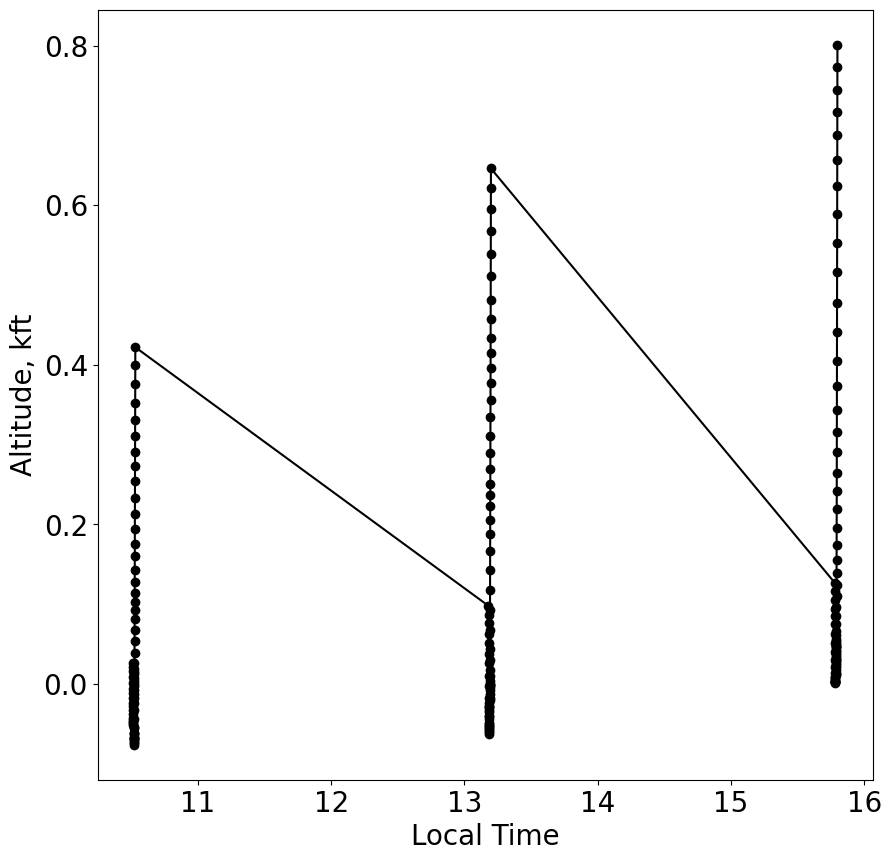

In [94]:
# How many times were we at Ninoy Aquino on this day?
ft = 20 # font size
fig, ax = plt.subplots(figsize=(10, 10))
# Add 8 hours to Time_Start to convert from UTC to local time
ax.plot(data_within_3km['Time_Start']/60/60+8, data_within_3km['Pressure_Altitude']/1E3, '-o',color='black')
ax.set_xlabel('Local Time', fontsize=ft)
ax.set_ylabel('Altitude, kft', fontsize=ft)
# Convert to local time
#ax.set_xlim(data_within_1km['Time_Start'][0]/60/60+8, data_within_1km['Time_Start'].max()/60/60+8)
ax.tick_params(axis='both', which='major', labelsize=ft)


In [98]:
# 3 times, around 10am, 1pm, and 4pm
data_within_3km['LocalTime'] = data_within_3km['Time_Start'] / 3600 + 8
# Create profiles for each time
data_morning   = data_within_3km[(data_within_3km['LocalTime'] < 11)]
data_midday    = data_within_3km[(data_within_3km['LocalTime'] > 13) & (data_within_3km['LocalTime'] < 14)]
data_afternoon = data_within_3km[(data_within_3km['LocalTime'] > 15)]


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


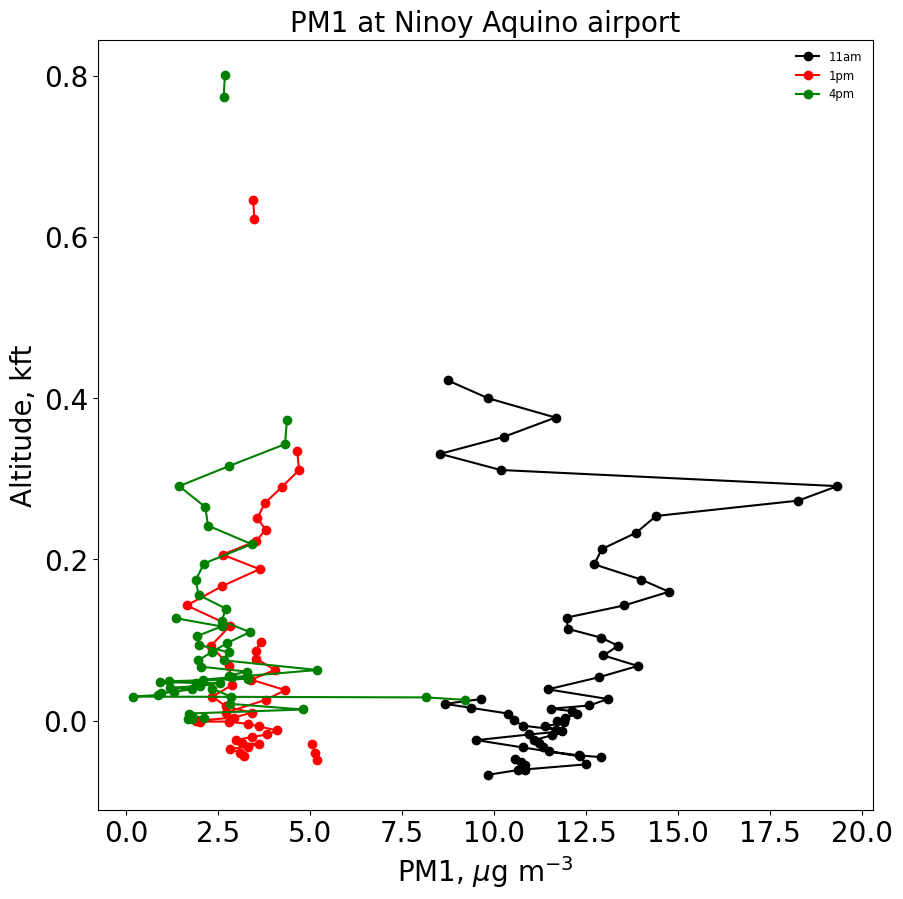

In [100]:
# Plot PM1 vs Altitude
ft = 20 # font size
fig, ax = plt.subplots(figsize=(10, 10))
# Add 8 hours to Time_Start to convert from UTC to local time
ax.plot(data_morning['PM1'], data_morning['Pressure_Altitude']/1E3, '-o',color='black', label='11am')
ax.plot(data_midday['PM1'], data_midday['Pressure_Altitude']/1E3,  '-o',color='red',label='1pm')
ax.plot(data_afternoon['PM1'], data_afternoon['Pressure_Altitude']/1E3,  '-o',color='green', label='4pm')

ax.set_xlabel('PM1, $\\mu$g m$^{-3}$', fontsize=ft)
ax.set_ylabel('Altitude, kft', fontsize=ft)
ax.set_title('PM1 at Ninoy Aquino airport', fontsize=ft)
# Convert to local time
#ax.set_xlim(data_within_1km['Time_Start'][0]/60/60+8, data_within_1km['Time_Start'].max()/60/60+8)
ax.tick_params(axis='both', which='major', labelsize=ft)
ax.legend(loc='upper right', fontsize='small', frameon=False)
